<a href="https://colab.research.google.com/github/MikeHaigDaly/CSRNet-pytorch/blob/master/Python%20Sectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import pandas as pd
from os import walk
import re

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


path = 'C:/Users/Michael/Desktop/'


In [2]:
from google.colab import files
uploaded = files.upload()


Saving PythonSectors.csv to PythonSectors.csv


In [3]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['PythonSectors.csv']))
df2.head()

,DES,Sector
0,"Wheelabrator Technologies, Inc. provides waste...",Biomass & Waste
1,Energy Development Corporation produces geothe...,Geothermal
2,Energy Development Corporation produces geothe...,Geothermal
3,Energy Development Corporation produces geothe...,Geothermal
4,Xnergy Inc. provides alternative energy soluti...,Efficiency: Built Environment


In [4]:
df2[df2['Sector'].str.contains('Biofuel')]

,DES,Sector
5,SunOpta BioProcess Inc. provides food. The Com...,Biofuels
6,SunOpta BioProcess Inc. provides food. The Com...,Biofuels
32,Maerka GmbH provides farming of oil seeds for ...,Biofuels
33,Global Ethano Il LLC produces ethanol made fro...,Biofuels
47,American BDF LLC operates in building small p...,Biofuels
49,"Tellurian Biodiesel Inc. produces, markets, an...",Biofuels
61,"Amyris, Inc. is a renewable products company. ...",Biofuels
75,Western Ethanol Company LLC markets and distr...,Biofuels
84,Usaciga Acucar Alcool e Energia Electrica Ltda...,Biofuels
94,General Bio Energy Inc. manufactures eco-petro...,Biofuels


In [7]:
# df2['Rating'].max()
# df2['Rating'].isnull().mean()
df2['DES'].count()
#df2['Review'].count()

4297

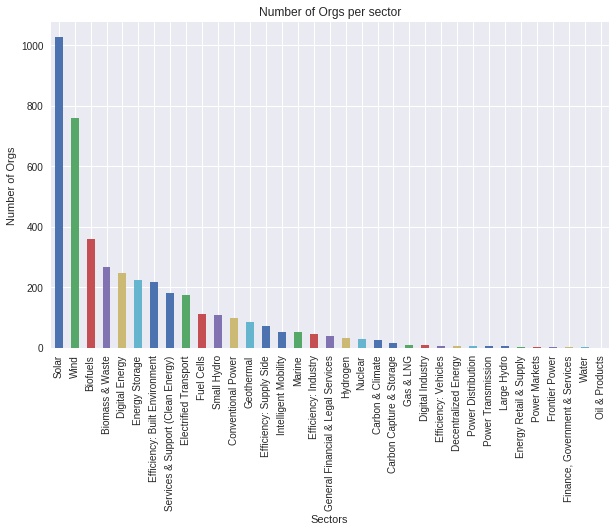

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

df2["Sector"].value_counts().sort_values(ascending=False).plot(kind="bar", ax=ax)

ax.set_title("Number of Orgs per sector")
ax.set_xlabel("Sectors")
ax.set_ylabel("Number of Orgs")

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


,Rating
count,42927.000000
mean,2.613903
std,1.266928
min,1.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,4.000000


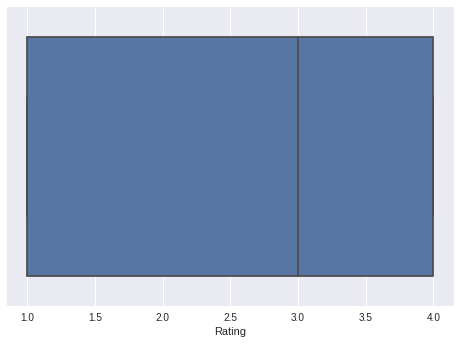

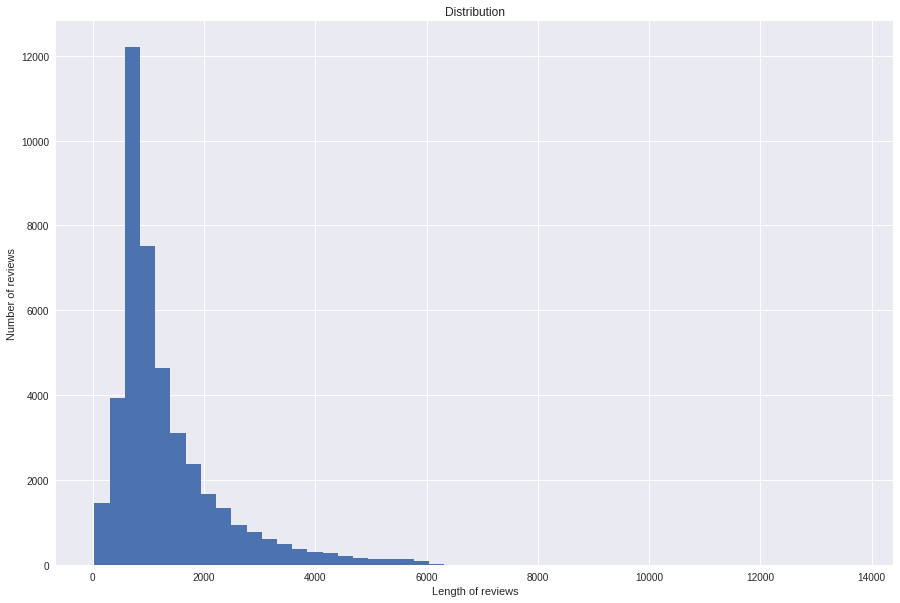

42927


In [0]:
plt.figure(figsize=(15, 10))
plt.hist([len(sample) for sample in list(df2['Review'])], 50)
plt.xlabel('Length of reviews')
plt.ylabel('Number of reviews')
plt.title('Distribution')
plt.show()
print(len(df2['Review']))


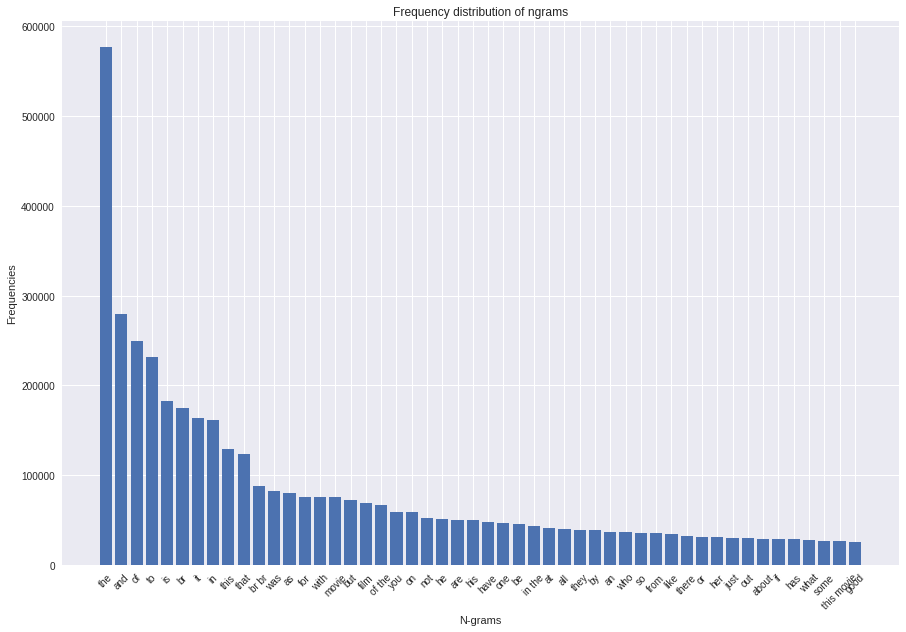

In [0]:
kwargs = {
    'ngram_range' : (1, 2),
    'dtype' : 'int32',
    'strip_accents' : 'unicode',
    'decode_error' : 'replace',
    'analyzer' : 'word'
}

vectorizer = CountVectorizer(**kwargs)
vect_texts = vectorizer.fit_transform(list(df2['Review']))
all_ngrams = vectorizer.get_feature_names()
num_ngrams = min(50, len(all_ngrams))
all_counts = vect_texts.sum(axis=0).tolist()[0]

all_ngrams, all_counts = zip(*[(n, c) for c, n in sorted(zip(all_counts, all_ngrams), reverse=True)])
ngrams = all_ngrams[:num_ngrams]
counts = all_counts[:num_ngrams]

idx = np.arange(num_ngrams)

plt.figure(figsize=(15, 10))
plt.bar(idx, counts, width=0.8)
plt.xlabel('N-grams')
plt.ylabel('Frequencies')
plt.title('Frequency distribution of ngrams')
plt.xticks(idx, ngrams, rotation=45)
plt.show()


Honestly, how hard can it be to make a good remake? Obviously pretty hard! I was soooo excited to see this because I loved the original, and my friends go and see it and tell me it really sucks. Well, I finally see it and I was sooo disapointed. Ok, the shower scene was more realistic...that's why I gave it a 3. Otherwise, it did suck. Vince Vaughn does a terrible job playing Norman, he's just too dense or something. I don't know, it was just terrible. Don't see it!


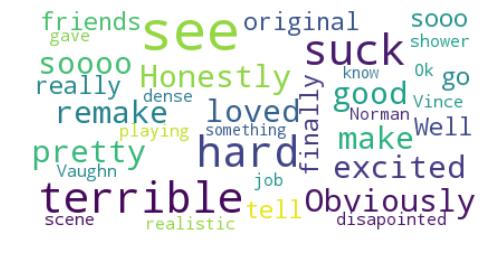

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = df2['Review'][3298]
print(text)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
tokens = word_tokenize(df2['Review'][0])
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:10])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['mr', 'costner', 'dragged', 'movie', 'far', 'longer', 'necessary', 'aside', 'terrific', 'sea']


In [0]:
print(stop_words)

{'is', 'was', 'on', 'she', 'hadn', "mightn't", 'yourselves', 'very', 'don', 'itself', 'why', 'through', 'same', 'does', 'he', 'there', 'isn', 'aren', 're', "hadn't", 'than', 'again', "wouldn't", 'o', 'y', 'by', 'above', 'then', 'will', 'did', 'm', 'to', 'shan', 'during', 'at', 'those', 'more', 'because', 'now', "doesn't", 'having', "isn't", "shan't", 'no', 'as', "she's", 'didn', 'doesn', 'needn', 'won', 'your', 'for', 'am', 'be', 'wasn', 'do', "couldn't", 've', "aren't", 'a', 'these', 'after', "haven't", 'so', 'ours', 'in', 'all', "don't", 'this', 'too', 'before', 'once', 'against', 'off', 'down', 'ma', 'whom', 'that', 'its', 'weren', 'further', 'being', 'below', 'only', "you'd", 'out', 'up', 'ourselves', 'which', 'with', 'the', 'has', 'him', 'most', 'an', 'own', 'themselves', 'they', 'of', 'can', 'couldn', 'our', 'wouldn', 'if', 'such', 'haven', "you're", 'not', 'we', 'who', 'how', 'some', "weren't", "shouldn't", 'doing', 'and', "you've", 't', 'himself', 'you', 'their', 'should', 'my'

In [0]:
from nltk.stem.snowball import SnowballStemmer
nltk.download('wordnet')
stemmer = SnowballStemmer('english')
stemmed_words = [stemmer.stem(word) for word in words]

from nltk import WordNetLemmatizer

lem = WordNetLemmatizer()
lemmatised_words = [lem.lemmatize(word, 'v') for word in words]

print('original')
print(words[:10])
print('stemmed')
print(stemmed_words[:10])
print('lemmatised')
print(lemmatised_words[:10])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
original
['mr', 'costner', 'dragged', 'movie', 'far', 'longer', 'necessary', 'aside', 'terrific', 'sea']
stemmed
['mr', 'costner', 'drag', 'movi', 'far', 'longer', 'necessari', 'asid', 'terrif', 'sea']
lemmatised
['mr', 'costner', 'drag', 'movie', 'far', 'longer', 'necessary', 'aside', 'terrific', 'sea']


In [0]:
# apply lemmatising
from textblob import Word
df2["text_lemmatised"] = df2['Review'].apply(lambda x: " ".join([lem.lemmatize(word, 'v') for word in x.split()]))
print(df2['Review'].values[0])
print("---------------")
print(df2["text_lemmatised"].values[0])

Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.
---------------
Once again Mr. Costner have drag out a movie for far longer than necessary. Aside f

In [0]:
from sklearn.model_selection import train_test_split

X = df2["text_lemmatised"]
y = df2['Rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# # stratify=y using the number of stars as the class labels rather than the column titles
#tt = vec.fit_transform(X_test)

print(X_train[0:10])
y.value_counts()


11020    Having live in Japan for several years this mo...
11021    I saw and have the original 1959 black and whi...
41885    John Boorman's "Deliverance" concern four subu...
25637    In my opinion, A GUY THING be a hilarious, wit...
6415     I would probably want to give this movie a zer...
28336    I saw One Life Stand when it premier at the 20...
20901    I be root for this film as it's a remake of a ...
8493     Joe Don's open line say everything about this ...
13643    I just saw this movie last night, and after re...
25656    This cartoon be strange, but the story actuall...
Name: text_lemmatised, dtype: object


4    17125
1    12238
2     9223
3     4341
Name: Rating, dtype: int64

In [0]:
print(X_test.shape)

(12879,)


In [0]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# turns text into a matrix of tokens 

vectorizer_1000 = CountVectorizer(binary=False,
                                   stop_words='english',
                                   min_df=2)

X_train_text = vectorizer_1000.fit_transform(X_train)
tt = vectorizer_1000.fit_transform(X_test)
rf = RandomForestClassifier()
rf.fit(X_train_text, y_train);


In [0]:
print(tt.shape)
print(X_train.shape)

(12879, 30645)
(30048,)


In [0]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
#
scores = cross_val_score(rf, X_train_text, y_train, cv=7)

print(scores, np.mean(scores))

[0.56414435 0.55682347 0.55229443 0.55521901 0.56570363 0.56350501
 0.55628059] 0.5591386436943828


In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators'      : [50,70],
    #'max_depth'         : [8, 9, 10, 11, 12],
    #'random_state'      : [0],
    #'max_features': ['auto'],
    #'criterion' :['gini']
}    
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
clf.fit(X_train_text, y_train)
clf.best_score_

0.6141506922257721

In [0]:
from tqdm import tqdm
import time
pbar = tqdm(total=100)
for i in range(10):
    time.sleep(0.1)
    pbar.update(10)
pbar.close()
clf.best_params_

100%|██████████| 100/100 [00:01<00:00, 98.60it/s]


{'n_estimators': 50}

In [0]:
def get_feature_importances(vocabulary, rf_importances, top_n):
    vocab_features = sorted(vocabulary.items(), key=lambda x: x[1])
    importances = zip(vocab_features, rf_importances)
    
    for z in sorted(importances, key=lambda x: abs(x[1]), reverse=True)[:top_n]:
        print(z)

rf = RandomForestClassifier()
rf.fit(X_train_text, y_train);
get_feature_importances(vectorizer_1000.vocabulary_, rf.feature_importances_, 10)



(('worst', 43971), 0.013281788080044215)
(('waste', 43117), 0.006438081995041775)
(('bad', 3201), 0.005854023963953717)
(('love', 23685), 0.003830300427904357)
(('great', 17064), 0.003498026876584923)
(('money', 26101), 0.003408389139348297)
(('best', 4101), 0.0032932211510601286)
(('terrible', 39459), 0.0032476355949574006)
(('movie', 26449), 0.0031526411403264543)
(('awful', 3063), 0.0028446203529031255)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

def try_new_vectoriser(vec, X, y):
    X_train_text = vec.fit_transform(X)
    print('vocabulary length')
    print(len(vec.vocabulary_))
    rf = RandomForestClassifier()
    scores = cross_val_score(rf, X_train_text, y_train, cv=7)
    print('scores')
    print(scores)
    print('mean scores')
    print(np.mean(scores))

tfidf_vec = TfidfVectorizer(stop_words="english",
                            min_df=2,
                            ngram_range=(1, 2))

try_new_vectoriser(tfidf_vec,
                   X_train,
                   y_train)

vocabulary length
368744
scores
[0.56088475 0.55635771 0.55439087 0.56686859 0.5638397  0.55208576
 0.55697973]
mean scores
0.5587724439139615


In [0]:
from tqdm import tqdm
import time
pbar = tqdm(total=100)
for i in range(10):
    time.sleep(0.1)
    pbar.update(10)
pbar.close()
parameters = {
    'n_estimators'      : [50],
    #'max_depth'         : [8, 9, 10, 11, 12],
    #'random_state'      : [0],
    #'max_features': ['auto'],
    #'criterion' :['gini']
}    
clf2 = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
clf2.fit(X_train_text, y_train)
clf2.best_score_

100%|██████████| 100/100 [00:01<00:00, 98.54it/s]


0.6108559637912673

In [0]:
rf = RandomForestClassifier()
rf.fit(tfidf_vec.fit_transform(X_train), y_train)

get_feature_importances(tfidf_vec.vocabulary_, rf.feature_importances_, 10)

(('waste', 352478), 0.006749144100575108)
(('great', 139696), 0.005280778284767006)
(('worst', 363908), 0.004546277922808914)
(('bad', 23431), 0.00408894169255815)
(('worse', 363677), 0.002659347593581313)
(('awful', 22631), 0.0025986355990189336)
(('don', 91518), 0.0022035663923890914)
(('like', 185890), 0.001954910762344214)
(('excellent', 107038), 0.0019184988736129626)
(('thing', 324951), 0.0018154005499357896)


In [0]:
print(clf.best_score_)
print(clf2.best_score_)

0.6141506922257721
0.6108559637912673


In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score

vec = TfidfVectorizer(stop_words="english", min_df=2, ngram_range=(1, 2))
X_train_text = vec.fit_transform(X_train)
X_test_text = vec.transform(X_test)

rf = RandomForestClassifier()
rf.fit(X_train_text, y_train)
clf.fit(X_train_text, y_train)
y_pred = rf.predict(X_test_text)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.5612236974920413
[[2501  324    7  840]
 [1253  428   12 1074]
 [ 247  114    9  932]
 [ 621  215   12 4290]]
